CAR PRICE PREDICTION WITH MACHINE LEARNING

In [16]:
#importing all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

In [17]:
# loading the dataset
data = pd.read_csv('car.csv')
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Data preprocessing

In [18]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [19]:
#checking for missing values
data.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [20]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [21]:
#independent variables
x = data[['horsepower', 'curbweight', 'enginesize', 'compressionratio', 'citympg', 'highwaympg', 'carbody', 'carlength', 'CarName','cylindernumber']]
x.head()

,horsepower,curbweight,enginesize,compressionratio,citympg,highwaympg,carbody,carlength,CarName,cylindernumber
0,111,2548,130,9.0,21,27,convertible,168.8,alfa-romero giulia,four
1,111,2548,130,9.0,21,27,convertible,168.8,alfa-romero stelvio,four
2,154,2823,152,9.0,19,26,hatchback,171.2,alfa-romero Quadrifoglio,six
3,102,2337,109,10.0,24,30,sedan,176.6,audi 100 ls,four
4,115,2824,136,8.0,18,22,sedan,176.6,audi 100ls,five


In [22]:
# Encode categorical variables
le = LabelEncoder()
x[['carbody', 'CarName', 'cylindernumber']] = x[['carbody', 'CarName', 'cylindernumber']].apply(le.fit_transform)
x = pd.get_dummies(x, drop_first=True)


C:\Users\lenovo\AppData\Local\Temp\ipykernel_3632\604460898.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[['carbody', 'CarName', 'cylindernumber']] = x[['carbody', 'CarName', 'cylindernumber']].apply(le.fit_transform)


In [23]:
x.head()

,horsepower,curbweight,enginesize,compressionratio,citympg,highwaympg,carbody,carlength,CarName,cylindernumber
0,111,2548,130,9.0,21,27,0,168.8,2,2
1,111,2548,130,9.0,21,27,0,168.8,3,2
2,154,2823,152,9.0,19,26,2,171.2,1,3
3,102,2337,109,10.0,24,30,3,176.6,4,2
4,115,2824,136,8.0,18,22,3,176.6,5,1


In [24]:
#target variable
y = data['price']
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [25]:
#split the data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=1)

In [26]:
#linear regression
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [27]:
y_test

78      6669.0
97      7999.0
151     6338.0
44      8916.5
40     10295.0
        ...   
66     18344.0
114    17075.0
54      7395.0
93      7349.0
122     7609.0
Name: price, Length: 82, dtype: float64

In [28]:
y_pred = model.predict(x_test)
y_pred

array([ 6273.63300987,  6257.62470842,  4479.27274161,  5749.41947793,
       11398.67021996, 25893.02662623,  7788.65567939,  1328.41081533,
        4539.75035596, 11631.90117956, 16828.24258448, 16842.47897009,
       14370.30928215, 10988.27316361, 19527.85883675, 15357.20752133,
        7580.57029699,  6649.15142316, 17901.48708662, 10398.10531682,
       10060.32623623,  5811.70860031, 13161.73908471,  8132.2745458 ,
       14379.46181044,  6508.63430393, 18758.3623909 ,  7916.30770089,
        5343.46464722,  7395.6033878 ,  5937.24720761, 11902.39703279,
       28886.38539227, 11677.71490773, 18980.34106495,  8027.74416869,
        9313.53266977, 32824.20922884, 12430.3701639 , 15164.18954109,
        5490.07805146, 22762.86714363,  8661.1138324 ,  8860.12630215,
        7591.44570712,  7322.10308374, 38026.83222866,  6562.77735591,
       17581.08746513, 21651.89534279, 27021.0645104 , 13771.35374974,
       20777.60607535,  5475.41582107, 12462.42568191,  7052.2006766 ,
      

In [29]:
#get the efficency of the model
r2 = r2_score(y_test, y_pred)
print(f"Efficiency of the model:{r2*100}%")

Efficiency of the model:85.28696402616147%


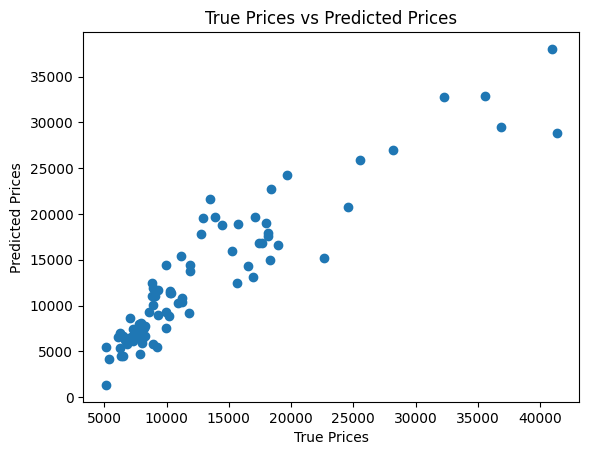

In [30]:
#visualize the results
plt.scatter(y_test, y_pred)
plt.xlabel("True Prices")
plt.ylabel("Predicted Prices")
plt.title("True Prices vs Predicted Prices")
plt.show()
